In [683]:
from googleapiclient.discovery import build 
from textblob import TextBlob
import nltk 
from wordcloud import WordCloud
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [800]:
def get_comments(vid_id):
    # create list for comments 
    comments=[]
    
    # create the youtube object to use api
    api_key=''
    youtube= build('youtube','v3',developerKey=api_key)
    
    # obtain video results 
    
    data=youtube.commentThreads().list(
    part='snippet,replies',
    videoId=vid_id,
    maxResults=100).execute()
    
    num_iterations=1
    
    while data: 
        for items in data['items']:
            #get comments and add to list 
            comment=items['snippet']['topLevelComment']['snippet']['textDisplay']
            comments.append(comment)
  
        if 'nextPageToken' in data and num_iterations <5: 
            data=youtube.commentThreads().list(
            part='snippet,replies',
            videoId=vid_id,
            pageToken=data['nextPageToken'],
            maxResults=100).execute()   
            num_iterations+=1
        else:
            break 
            
    df=pd.DataFrame(comments,columns=["comments"])
    return(df)
     
    

In [831]:
stopwords = nltk.corpus.stopwords.words("english")
#add more words to remove 
stopwords.extend(["vaccine","vaccinate","vaccinated","vaccination","covid","vaccines","br","quot","people",
                  "know","one","want","take","virus","getting","got","nurse","cnn","mandate"])

def stop_words_remover(sentence):
    """Removes stop words from sentences and returns back the filtered sentence as a string"""
    return " ".join([i for i in nltk.word_tokenize(sentence) if i not in stopwords])

def remove_punctuations(sentence):
    """Removes any non alphanumeric"""
    return " ".join([i for i in nltk.word_tokenize(sentence) if i.isalnum()])

def to_lower(sentence):
    return " ".join([i.lower() for i in nltk.word_tokenize(sentence)])

lemmatizer = nltk.WordNetLemmatizer()

def lemmatize(sentence): 
    return " ".join([lemmatizer.lemmatize(i) for i in nltk.word_tokenize(sentence)])

corrector=Speller(lang='en')

def preprocess(df,col): 
    df['processed_comments']=df[col].apply(to_lower).apply(stop_words_remover).apply(remove_punctuations)
    return df



In [737]:
def text_blob_sentiment(df,col): 
    blob_objects=df[col].apply(TextBlob)
    sentiment_scores=[{"polarity":i.sentiment.polarity,
                       "subjectivity":i.sentiment.subjectivity
                      }for i in blob_objects.values]
    sentiment_scores_df=pd.DataFrame(sentiment_scores)
    sentiment_df=pd.concat([df,sentiment_scores_df],axis=1)
    return(sentiment_df)

In [738]:
def vader_sentiment(df,col):
    sia=SentimentIntensityAnalyzer()
    sentiment_scores=df[col].apply(sia.polarity_scores)
    # append scores to dataframe 
    df['negative']=sentiment_scores.apply(lambda neg:neg["neg"])
    df['neutral']=sentiment_scores.apply(lambda neu:neu["neu"])
    df['positive']=sentiment_scores.apply(lambda pos:pos["pos"])
    df['compound']=sentiment_scores.apply(lambda comp:comp["compound"])
    return df

In [889]:
def generate_word_cloud(df):
    wc=WordCloud(width=1600,height=800,background_color='black',
                 stopwords=STOPWORDS).generate(" ".join(df.processed_comments))
    plt.figure(figsize=(14,10))
    plt.imshow(wc,interpolation='bilinear')
    plt.axis('off')

* https://www.youtube.com/watch?v=zgVo9i-xgwo&ab_channel=NBCNews 
* https://www.youtube.com/watch?v=Uw5Lwak8gXY&ab_channel=NBCNews 
* https://www.youtube.com/watch?v=Re3Z5svoITA&ab_channel=NBCNews
* https://www.youtube.com/watch?v=KK6J99hJB5k&ab_channel=NBCNews
* https://www.youtube.com/watch?v=jCU5C4SrIlI&ab_channel=NBCBayArea
* https://www.youtube.com/watch?v=-ZW4T0L38J8&ab_channel=NBCNews
* https://www.youtube.com/watch?v=4HsgKF2hagQ&ab_channel=CNN
* https://www.youtube.com/watch?v=rzUASFzT_2k&ab_channel=CNN

In [801]:
CNN=get_comments('zgVo9i-xgwo')

In [802]:
CNN_processed=preprocess(CNN,'comments')

In [803]:
vader_sentiment(CNN_processed,"comments").mean()

/var/folders/nr/smj0dvmd7x3fmk66dmf8q3s00000gn/T/ipykernel_62403/104527717.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  vader_sentiment(CNN_processed,"comments").mean()


negative    0.109586
neutral     0.714222
positive    0.170184
compound    0.047950
dtype: float64

We can see that we have a bunch of text though it does not matterWe can see that we have a bunch of text though it does not matter We can see that we have a bunch of text though it does not matterWe can see that we have a bunch of text though it does not matterWe can see that we have a bunch of text though it does not matterWe can see that we have a bunch of text though it does not matterWe can see that we have a bunch of text though it does not matterWe can see that we have a bunch of text though it does not matterWe can see that we have a bunch of text though it does not matterWe can see that we have a bunch of text though it does not matter

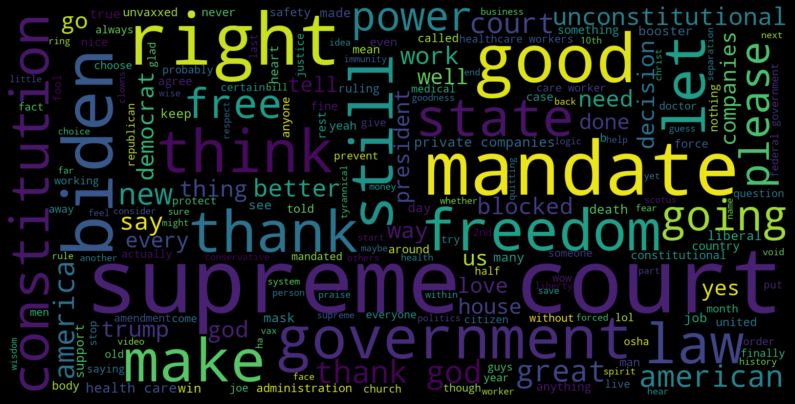

In [887]:
generate_word_cloud(CNN_processed[CNN_processed.compound>0])

In [832]:
mm_2=get_comments('rzUASFzT_2k')

In [833]:
mm_2_process=preprocess(mm_2,'comments')

In [834]:
mm_2

,comments,processed_comments
0,14K DISLIKES!!,14k dislikes
1,Guess YouTube is no longer censoring the fact ...,guess youtube longer censoring fact pfizer try...
2,The core issue has always been Is it legal to ...,core issue always legal dubious lame journalis...
3,STOP WITH YOUR FEAR MONGERING AND PUSHING LIES...,stop fear mongering pushing lies propaganda ci...
4,LIKES: 3.2K<br>DISLIKES: 14K,likes dislikes 14k
...,...,...
495,Meanwhile the Neatherlands is &#39;out of cont...,meanwhile neatherlands 39 control 39 hundreds ...
496,"to the left,, the right, and all in between......",left right going die day nothing stop born not...
497,Bullshit,bullshit
498,2022 I see censorship is the name of the game....,2022 see censorship name game past years post ...


In [835]:
vader_sentiment(mm_2_process,'comments').mean()

/var/folders/nr/smj0dvmd7x3fmk66dmf8q3s00000gn/T/ipykernel_62403/3539703479.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  vader_sentiment(mm_2_process,'comments').mean()


negative    0.169624
neutral     0.732328
positive    0.096034
compound   -0.118699
dtype: float64

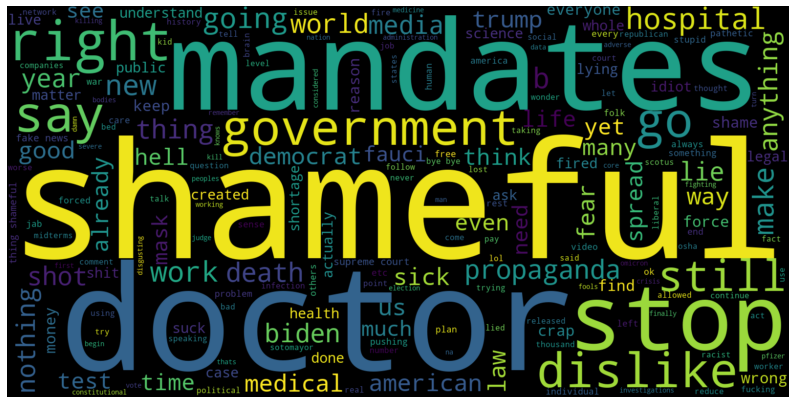

In [890]:
generate_word_cloud(mm_2_process[mm_2_process.compound<0])

In [837]:
mm_3=get_comments('4HsgKF2hagQ')

In [838]:
mm_3_process=preprocess(mm_3,'comments')

In [840]:
vader_sentiment(mm_3_process,'comments').mean()

/var/folders/nr/smj0dvmd7x3fmk66dmf8q3s00000gn/T/ipykernel_62403/4219069779.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  vader_sentiment(mm_3_process,'comments').mean()


negative    0.111518
neutral     0.736144
positive    0.148336
compound    0.027544
dtype: float64

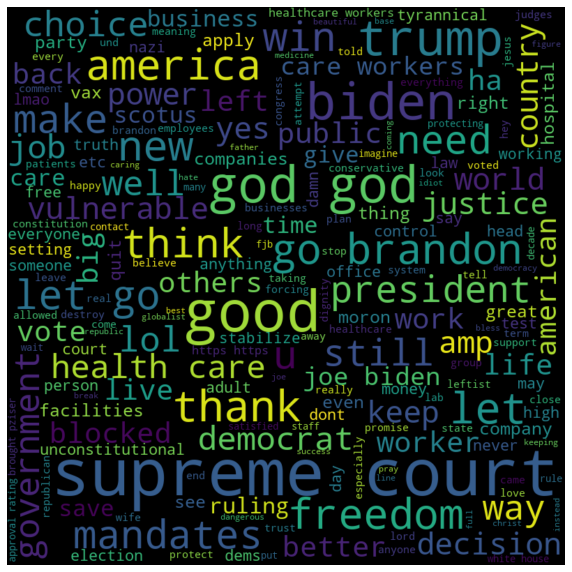

In [841]:
generate_word_cloud(mm_3_process[mm_3_process.compound>0])

In [842]:
mm_4=get_comments('-ZW4T0L38J8')


In [843]:
mm_4_process=preprocess(mm_4,'comments')

In [844]:
vader_sentiment(mm_4_process,'comments')

,comments,processed_comments,negative,neutral,positive,compound
0,Oh and one more thing! Since you anti vaxxers ...,oh thing since anti vaxxers problem mandates e...,0.180,0.820,0.000,-0.8198
1,Then those who refuse to vaccinate can stay ho...,refuse stay home never come stop spreading ant...,0.211,0.705,0.083,-0.4412
2,How bout locking up AMERICAS DR FAUCI......lik...,bout locking americas dr fauci like moon man p...,0.276,0.724,0.000,-0.8720
3,Reject all incumbents. Make all seated offic...,reject incumbents make seated officials pay jobs,0.272,0.728,0.000,-0.4767
4,1. The vaccine is not a cure.<br>2. Promiscuit...,1 cure 2 promiscuity breeds infection 3 many c...,0.100,0.769,0.132,0.0341
...,...,...,...,...,...,...
495,In what reality did they think this would be p...,reality think would popular anyone insane,0.138,0.718,0.144,0.0258
496,These mandates are ILLEGAL &amp; UNCONSTITUTIO...,mandates illegal amp unconstitutional get fire...,0.148,0.690,0.162,-0.5285
497,The idiocy of this administration and its supp...,idiocy administration supporters set humans ba...,0.000,0.818,0.182,0.4404
498,"Wait, at what % do we reach herd immunity? 🙄😏C...",wait reach herd immunity quietly cover darknes...,0.106,0.864,0.031,-0.4003


In [845]:
mm_4_process[mm_4_process.compound!=0].mean()

/var/folders/nr/smj0dvmd7x3fmk66dmf8q3s00000gn/T/ipykernel_62403/3860011744.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mm_4_process[mm_4_process.compound!=0].mean()


negative    0.153763
neutral     0.724461
positive    0.121809
compound   -0.057408
dtype: float64

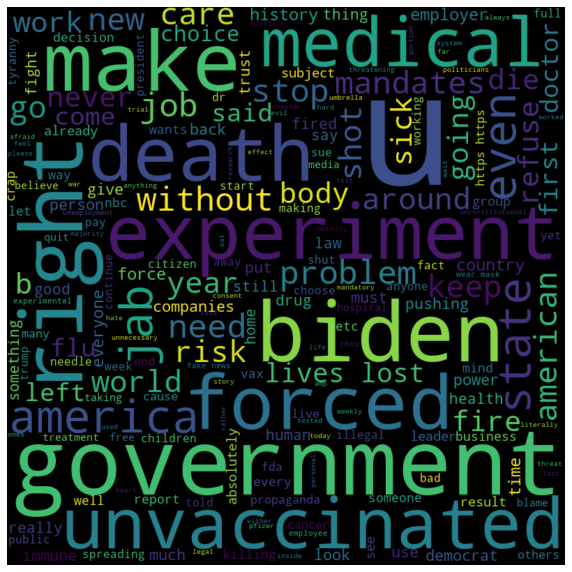

In [846]:
generate_word_cloud(mm_4_process[mm_4_process.compound<0])

In [847]:
mm_5=get_comments('qI9kOw4K6is')
mm_5_process=preprocess(mm_5,'comments')
vader_sentiment(mm_5_process,'comments')

,comments,processed_comments,negative,neutral,positive,compound
0,WHO CARES JUST,cares,0.000,0.400,0.600,0.4588
1,"David, thank you for speaking out and standing...",david thank speaking standing free citizen als...,0.044,0.866,0.090,0.7677
2,he didn&#39;t quit. he retired. after 30 years...,39 quit retired 30 years likely retire anyway ...,0.000,0.806,0.194,0.7184
3,I am happy for you I truly am I do not like th...,happy truly like needles 39 taken intention ta...,0.118,0.790,0.092,-0.8762
4,Of course we&#39;re going to win in the end!! ...,course 39 going win end praise god,0.000,0.442,0.558,0.8774
...,...,...,...,...,...,...
495,NAVY SEALS CANT JUST UP AND QUIT!,navy seals cant quit,0.000,1.000,0.000,0.0000
496,Someone reach out to this man..offer him a job...,someone reach man offer job somewhere pls,0.000,0.846,0.154,0.1179
497,Come to Tennessee or Alabama..or Mississippi.....,come tennessee alabama mississippi needs come ...,0.000,0.795,0.205,0.6597
498,Amen brother 💪🏾🗣️🗣️,amen brother,0.000,1.000,0.000,0.0000


In [848]:
mm_5.compound.mean()

0.2945995999999999

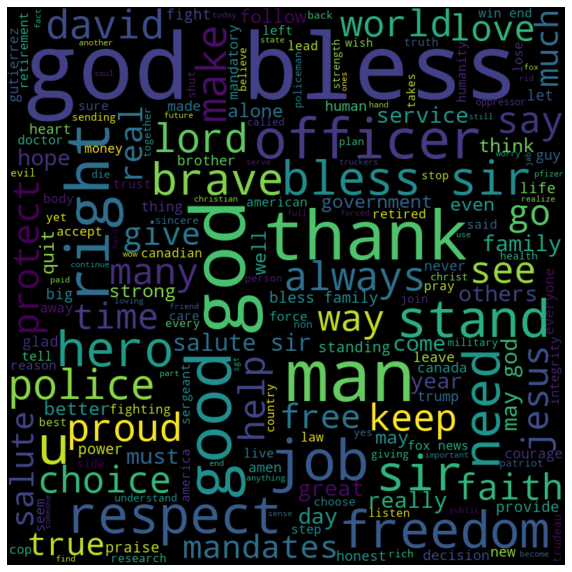

In [849]:
generate_word_cloud(mm_5_process[mm_5_process.compound>0])

In [881]:
mm_6=get_comments('7Qk3NyAV_Q4')
mm_6_preprocess=preprocess(mm_6,'comments')
vader_sentiment(mm_6_preprocess,'comments')

,comments,processed_comments,negative,neutral,positive,compound
0,How many people support this vaccine mandate? ...,many support support thumbs,0.180,0.687,0.133,-0.2445
1,How long do you think you can fool the America...,long think fool american,0.225,0.775,0.000,-0.4404
2,Where are all of the biohazard receptacles for...,biohazard receptacles used masks dangerous,0.210,0.790,0.000,-0.6113
3,If it was the majority you would have more tha...,majority would 1 likes views sure miss dislike...,0.148,0.564,0.288,0.6077
4,FJB!,fjb,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...
495,Let’s go Brandon.,let go brandon,0.000,1.000,0.000,0.0000
496,&quot;Majority of workers support Biden&#39;s ...,majority workers support biden 39 business 39 ...,0.046,0.871,0.083,0.2023
497,Liars✌️live free or die ✌️✌️,free die,0.382,0.294,0.324,-0.1531
498,THAT IS A STRAIGHT UP LIE....,straight lie,0.000,0.678,0.322,0.2263


In [882]:
mm_6_preprocess.compound.mean()

-0.12925479999999986

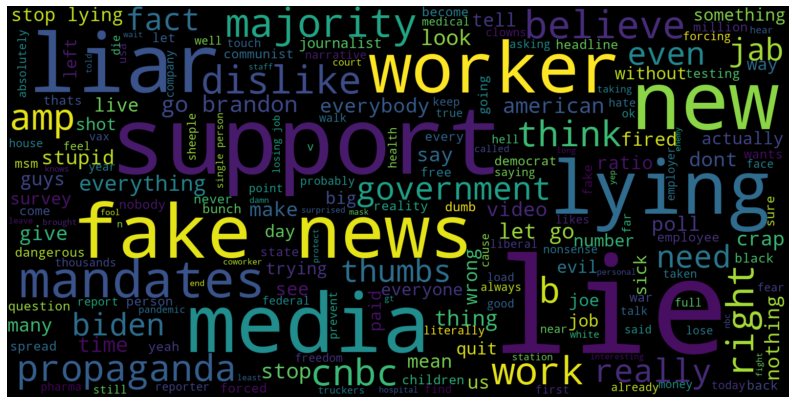

In [892]:
generate_word_cloud(mm_6_preprocess[mm_6_preprocess.compound<0])

# <font color='green'>green </font>
# <font color='olive'>olive </font>
# <font color='Violet'>Violet </font>
# <font color='Tomato'>Tomato </font>
# <font color='Blue'>Blue </font>
# <font color='Teal'>Teal </font>
# <font color='Lime'>Lime </font>
# <font color='Maroon'>olive </font>
# <font color='red'>Red </font>
# <font color='Yellow'>Yellow </font>
# <font color='navy'>navy </font>
# <font color='fuchsia'>fuchsia </font>
# <font color='sky blue'>sky blue </font>

